In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

overall = pd.read_csv("u.info.txt", header=None)
print("Details of users, items and ratings involved in the loaded movielens dataset: ",list(overall[0]))

Details of users, items and ratings involved in the loaded movielens dataset:  ['943 users', '1682 items', '100000 ratings']


In [18]:
colnames1 = ['user id','movie id','rating','timestamp']
dataset = pd.read_csv("u.data.txt", sep='\t',header=None,names=colnames1)
dataset.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [19]:
len(dataset), max(dataset['movie id']),min(dataset['movie id'])

(100000, 1682, 1)

In [21]:
d = 'movie id , movie title , release date , video release date , IMDb URL , unknown , Action , Adventure , Animation , Children , Comedy , Crime , Documentary , Drama , Fantasy , Film-Noir , Horror , Musical , Mystery , Romance , Sci-Fi , Thriller , War , Western'
colnames2 = d.split(' , ')
colnames2

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [22]:
items_dataset = pd.read_csv("u.item.txt", sep='|',header=None,names=colnames2,encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [24]:
merged_dataset = pd.merge(dataset, movie_dataset, how='inner', on='movie id')
merged_dataset.head()
merged_dataset.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [25]:
highavg_rating_movies = merged_dataset.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
highavg_rating_movies = highavg_rating_movies.to_frame()
highavg_rating_movies.head(20)

,rating
movie title,
Prefontaine (1997),5.000000
Santa with Muscles (1996),5.000000
"Great Day in Harlem, A (1994)",5.000000
Marlene Dietrich: Shadow and Light (1996),5.000000
Star Kid (1997),5.000000
Someone Else's America (1995),5.000000
Entertaining Angels: The Dorothy Day Story (1996),5.000000
They Made Me a Criminal (1939),5.000000
Aiqing wansui (1994),5.000000


Split of movies count based on their overall average rating


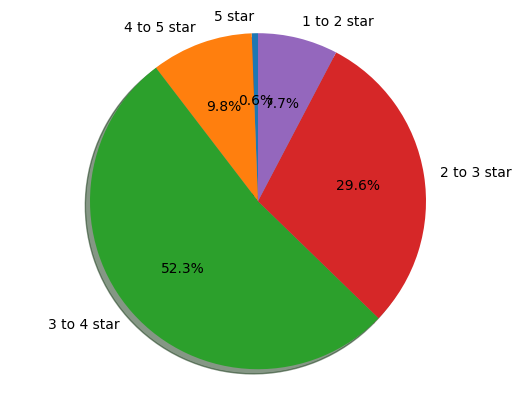

In [26]:
print('Split of movies count based on their overall average rating')
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star'
sizes = [10, 163, 871, 492, 128]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [27]:
highavg_rating_movies.reset_index(level=0, inplace=True)
highavg_rating_movies.columns = ['movie title', 'avg rating']
highavg_rating_movies.head(10)

,movie title,avg rating
0,Prefontaine (1997),5.0
1,Santa with Muscles (1996),5.0
2,"Great Day in Harlem, A (1994)",5.0
3,Marlene Dietrich: Shadow and Light (1996),5.0
4,Star Kid (1997),5.0
5,Someone Else's America (1995),5.0
6,Entertaining Angels: The Dorothy Day Story (1996),5.0
7,They Made Me a Criminal (1939),5.0
8,Aiqing wansui (1994),5.0
9,"Saint of Fort Washington, The (1993)",5.0


Text(0, 0.5, 'Number of times a user watched that movie')

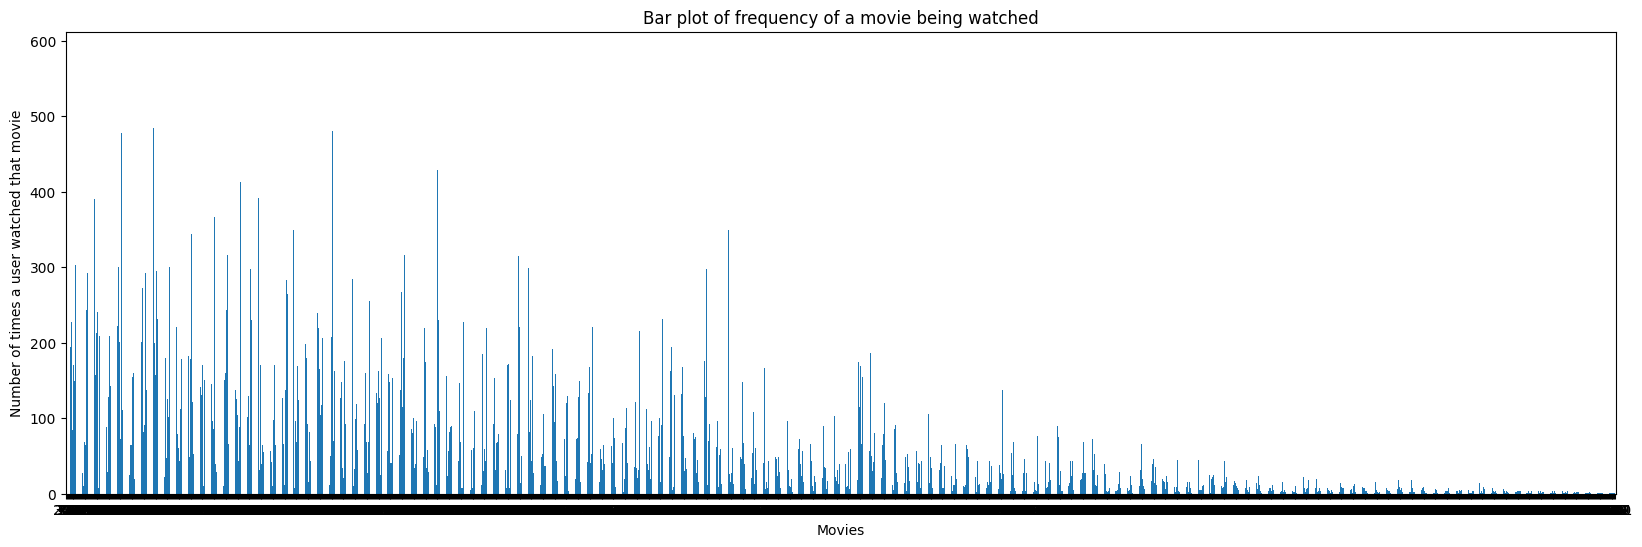

In [28]:
merged_dataset.groupby(['movie title']).agg({"rating":"sum"})['rating'].sort_values(ascending=False)
merged_dataset['movie id'].value_counts(sort=False).plot(kind='bar' ,figsize=(20,6), use_index = True, rot=0)
plt.title('Bar plot of frequency of a movie being watched')
plt.xlabel('Movies')
plt.ylabel('Number of times a user watched that movie')

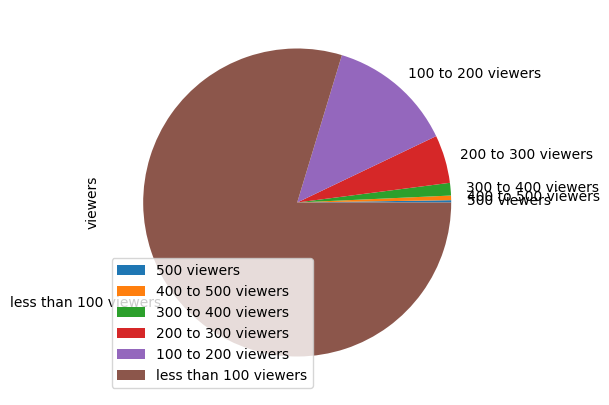

In [29]:
popular_movies = merged_dataset.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)
popular_movies = popular_movies.to_frame()
popular_movies.reset_index(level=0, inplace=True)
popular_movies.columns = ['movie title', 'Number of Users watched']

a1=len(popular_movies[popular_movies['Number of Users watched'] >= 500])
a2=len(popular_movies[(popular_movies['Number of Users watched'] >= 400) & (popular_movies['Number of Users watched'] < 500)])
a3=len(popular_movies[(popular_movies['Number of Users watched'] >= 300) & (popular_movies['Number of Users watched'] < 400)])
a4=len(popular_movies[(popular_movies['Number of Users watched'] >= 200) & (popular_movies['Number of Users watched'] < 300)])
a5=len(popular_movies[(popular_movies['Number of Users watched'] >= 100) & (popular_movies['Number of Users watched'] < 200)])
a6=len(popular_movies[(popular_movies['Number of Users watched'] < 100)])
df = pd.DataFrame({'viewers': [a1, a2, a3, a4, a5, a6]},
                  index=['500 viewers', '400 to 500 viewers', '300 to 400 viewers', '200 to 300 viewers', '100 to 200 viewers', 'less than 100 viewers'])
plot = df.plot.pie(y='viewers', figsize=(5, 5))

In [31]:
print(popular_movies[popular_movies['Number of Users watched'] >= 400])

                       movie title  Number of Users watched
0                 Star Wars (1977)                      583
1                   Contact (1997)                      509
2                     Fargo (1996)                      508
3        Return of the Jedi (1983)                      507
4                 Liar Liar (1997)                      485
5      English Patient, The (1996)                      481
6                    Scream (1996)                      478
7                 Toy Story (1995)                      452
8             Air Force One (1997)                      431
9    Independence Day (ID4) (1996)                      429
10  Raiders of the Lost Ark (1981)                      420
11           Godfather, The (1972)                      413


In [32]:
highly_rated_popular_movies = pd.merge(avg_highly_rated_movies, popular_movies, how = 'inner', on='movie title')
highly_rated_popular_movies.head(10)
print(highly_rated_popular_movies[highly_rated_popular_movies['Number of Users watched']>400])

                        movie title  avg rating  Number of Users watched
23                 Star Wars (1977)    4.358491                      583
34            Godfather, The (1972)    4.283293                      413
40   Raiders of the Lost Ark (1981)    4.252381                      420
64                     Fargo (1996)    4.155512                      508
129       Return of the Jedi (1983)    4.007890                      507
236                Toy Story (1995)    3.878319                      452
292                  Contact (1997)    3.803536                      509
412     English Patient, The (1996)    3.656965                      481
428            Air Force One (1997)    3.631090                      431
597                   Scream (1996)    3.441423                      478
598   Independence Day (ID4) (1996)    3.438228                      429
837                Liar Liar (1997)    3.156701                      485


In [33]:
print(highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']>300) & (highly_rated_popular_movies['avg rating']>=4.0)])

                                movie title  avg rating  \
23                         Star Wars (1977)    4.358491   
32         Silence of the Lambs, The (1991)    4.289744   
34                    Godfather, The (1972)    4.283293   
40           Raiders of the Lost Ark (1981)    4.252381   
45                           Titanic (1997)    4.245714   
49          Empire Strikes Back, The (1980)    4.204360   
61               Princess Bride, The (1987)    4.172840   
64                             Fargo (1996)    4.155512   
98   Monty Python and the Holy Grail (1974)    4.066456   
101                     Pulp Fiction (1994)    4.060914   
114                    Fugitive, The (1993)    4.044643   
129               Return of the Jedi (1983)    4.007890   

     Number of Users watched  
23                       583  
32                       390  
34                       413  
40                       420  
45                       350  
49                       367  
61             

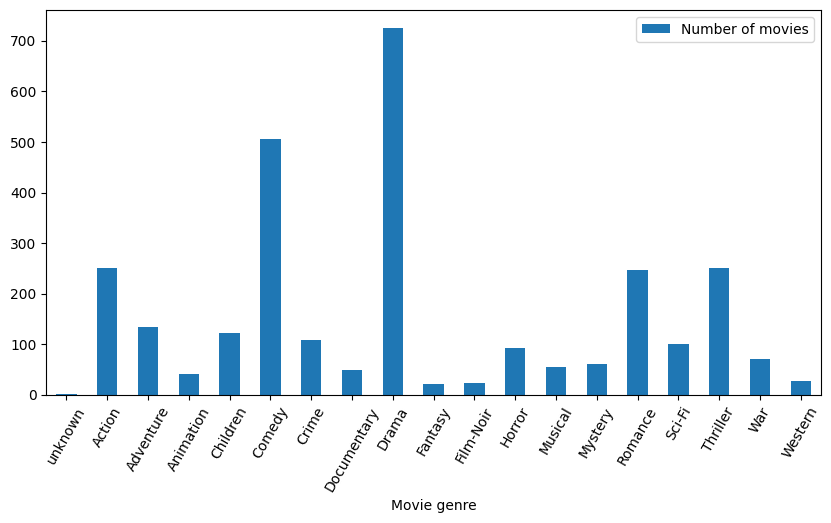

In [35]:
movie_genre_list = colnames2[-19:]
movie_genre_list

count = []
for i in movie_genre_list:
  genre_based_movies = items_dataset[['movie id','movie title',i]]
  genre_based_movies = genre_based_movies[genre_based_movies[i] == 1]
  count.append(len(genre_based_movies))
df = pd.DataFrame({'Movie genre':movie_genre_list, 'Number of movies':count})
ax = df.plot.bar(x='Movie genre', y='Number of movies', rot=60, figsize=(10, 5))

In [36]:
def star_based_visualization(dataframe):
  dataframe['rating'].value_counts(sort=False).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
  plt.title('Bar plot of rating frequency')
  plt.xlabel('Rating')
  plt.ylabel('Number of times a rating was given')
  plt.show()
  print("Total number of users watched this Genre: ",len(dataframe))
  print("  ")

In [41]:
def recommendations_genre(genre):
  x = genre
  print("GENRE: ", x)
  print("    ")
  genre_based_movies = items_dataset[['movie id','movie title',x]]
  genre_based_movies = genre_based_movies[genre_based_movies[x] == 1]
  merged_genre_movies = pd.merge(dataset, genre_based_movies, how='inner', on='movie id')

  star_based_visualization(merged_genre_movies)
  high_rated_movies = merged_genre_movies.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
  high_rated_movies = high_rated_movies.to_frame()
  print("                             ")
  print("                             ")
  print("Top movies naviely suggested to the new users for the requested movie genre:", x, ". Recommendations based on highest average ratings.")
  print(high_rated_movies.head(10))

  popular_movies_ingenre = merged_genre_movies.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)
  popular_movies_ingenre = popular_movies_ingenre.to_frame()
  popular_movies_ingenre.reset_index(level=0, inplace=True)
  popular_movies_ingenre.columns = ['movie title', 'Number of Users watched']
  print("                             ")
  print("                             ")
  print("Most popular movies recommended to a new user for",x,"genre. Recommendations based on Popularity")
  print(popular_movies_ingenre.sort_values('Number of Users watched', ascending=False).head(10))

  highly_rated_popular_movies = pd.merge(high_rated_movies, popular_movies_ingenre, how = 'inner', on='movie title')

  viewer_limit = 300
  ratings_limit = 4.0
  count = 0
  check = 0
  while viewer_limit > 0 and ratings_limit > 0:
    s = highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']>viewer_limit) & (highly_rated_popular_movies['rating']>=ratings_limit)]
    if len(s) < 11:
      if check == 0:
        viewer_limit -= 50
        check = 1
      else:
        ratings_limit -= 0.5
        check = 0
    else:
      break
  print("Movies best to suggest to a new user within requested genre; popular and well rated by the users who already watched them.")
  print("These have rating more than ",ratings_limit," with atleast ",viewer_limit ," viewers.")
  print("                             ")
  print("These are the Top rated popular movies")
  print(s)
  print("                             ")
  print("                             ")

GENRE:  Action
    


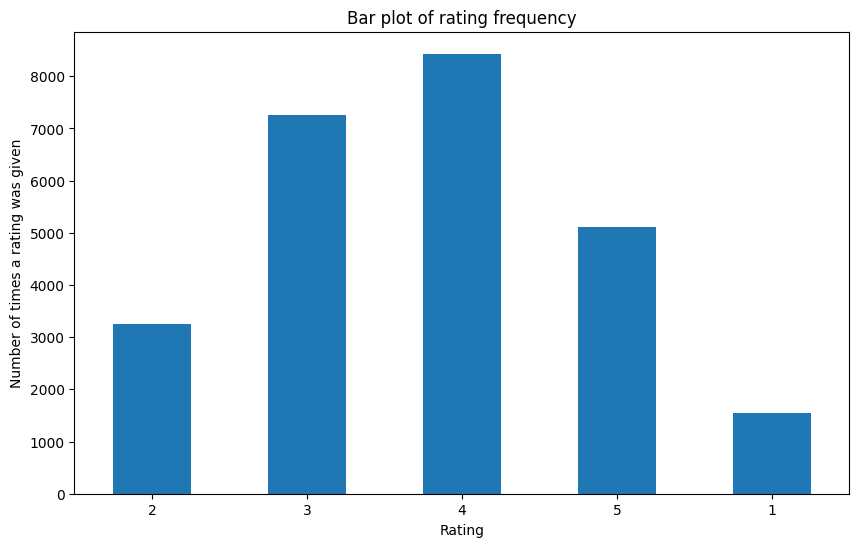

Total number of users watched this Genre:  25589
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Action . Recommendations based on highest average ratings.
                                   rating
movie title                              
Star Wars (1977)                 4.358491
Godfather, The (1972)            4.283293
Raiders of the Lost Ark (1981)   4.252381
Titanic (1997)                   4.245714
Empire Strikes Back, The (1980)  4.204360
Boot, Das (1981)                 4.203980
Godfather: Part II, The (1974)   4.186603
African Queen, The (1951)        4.184211
Princess Bride, The (1987)       4.172840
Braveheart (1995)                4.151515
                             
                             
Most popular movies recommended to a new user for Action genre. Recommendations based on Popularity
                       movie title  Number of Users watched
0                 Star Wars 

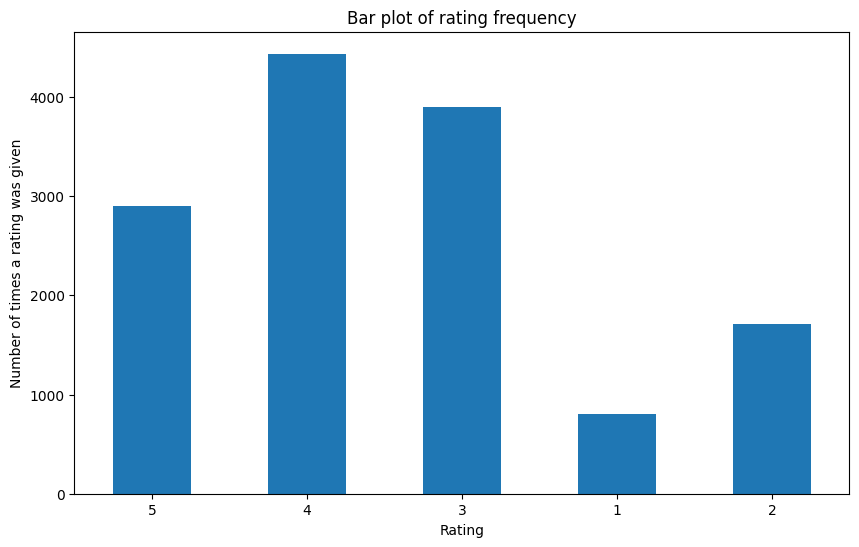

Total number of users watched this Genre:  13753
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Adventure . Recommendations based on highest average ratings.
                                            rating
movie title                                       
Star Kid (1997)                           5.000000
Star Wars (1977)                          4.358491
Raiders of the Lost Ark (1981)            4.252381
Lawrence of Arabia (1962)                 4.231214
Empire Strikes Back, The (1980)           4.204360
African Queen, The (1951)                 4.184211
Princess Bride, The (1987)                4.172840
Great Escape, The (1963)                  4.104839
Treasure of the Sierra Madre, The (1948)  4.100000
Wizard of Oz, The (1939)                  4.077236
                             
                             
Most popular movies recommended to a new user for Adventure genre. Recommenda

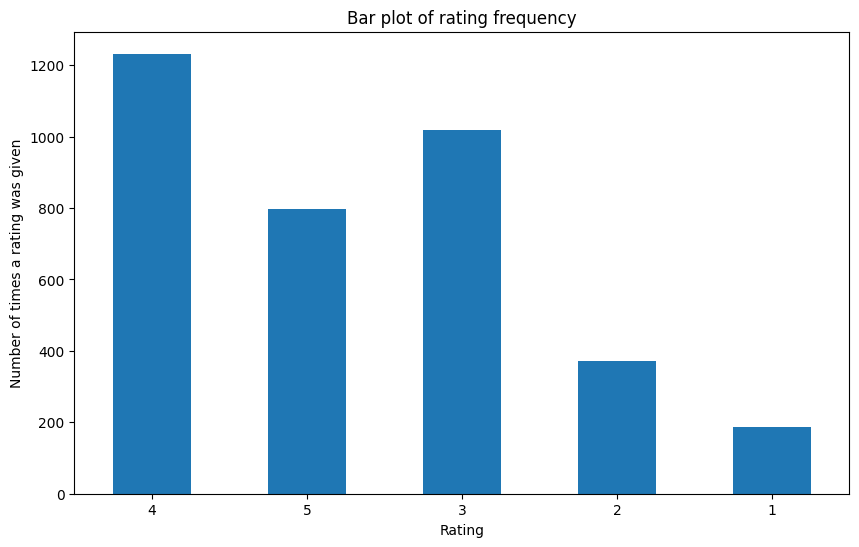

Total number of users watched this Genre:  3605
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Animation . Recommendations based on highest average ratings.
                                                      rating
movie title                                                 
Close Shave, A (1995)                               4.491071
Wrong Trousers, The (1993)                          4.466102
Wallace & Gromit: The Best of Aardman Animation...  4.447761
Faust (1994)                                        4.200000
Grand Day Out, A (1992)                             4.106061
Toy Story (1995)                                    3.878319
Aladdin (1992)                                      3.812785
Winnie the Pooh and the Blustery Day (1968)         3.800000
Beauty and the Beast (1991)                         3.792079
Lion King, The (1994)                               3.781818
                  

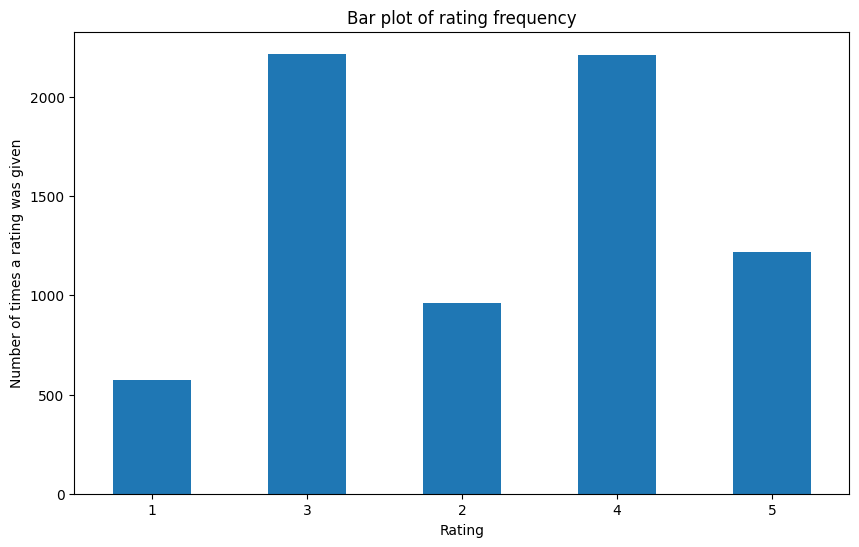

Total number of users watched this Genre:  7182
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Children . Recommendations based on highest average ratings.
                                               rating
movie title                                          
Star Kid (1997)                              5.000000
Wizard of Oz, The (1939)                     4.077236
Babe (1995)                                  3.995434
Toy Story (1995)                             3.878319
E.T. the Extra-Terrestrial (1982)            3.833333
Aladdin (1992)                               3.812785
Winnie the Pooh and the Blustery Day (1968)  3.800000
Beauty and the Beast (1991)                  3.792079
Lion King, The (1994)                        3.781818
Fantasia (1940)                              3.770115
                             
                             
Most popular movies recommended to a new us

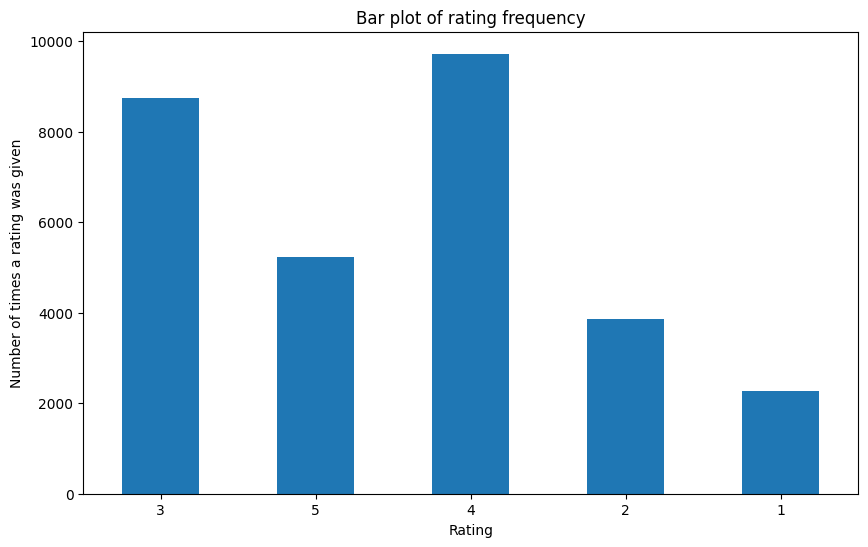

Total number of users watched this Genre:  29832
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Comedy . Recommendations based on highest average ratings.
                              rating
movie title                         
Santa with Muscles (1996)   5.000000
Close Shave, A (1995)       4.491071
Wrong Trousers, The (1993)  4.466102
North by Northwest (1959)   4.284916
Shall We Dance? (1996)      4.260870
As Good As It Gets (1997)   4.196429
Cinema Paradiso (1988)      4.173554
Princess Bride, The (1987)  4.172840
Waiting for Guffman (1996)  4.127660
A Chef in Love (1996)       4.125000
                             
                             
Most popular movies recommended to a new user for Comedy genre. Recommendations based on Popularity
                                    movie title  Number of Users watched
0                              Liar Liar (1997)                      485
1 

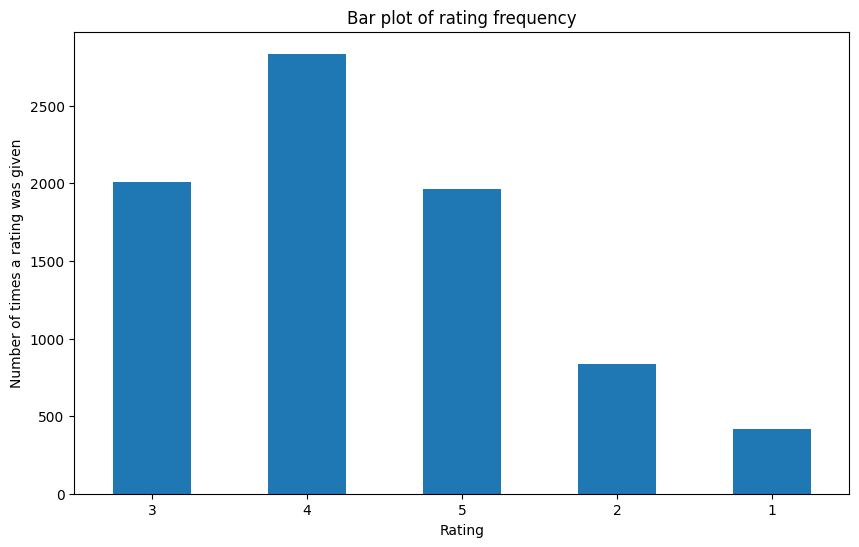

Total number of users watched this Genre:  8055
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Crime . Recommendations based on highest average ratings.
                                   rating
movie title                              
They Made Me a Criminal (1939)   5.000000
Usual Suspects, The (1995)       4.385768
Letter From Death Row, A (1998)  4.333333
Godfather, The (1972)            4.283293
Crossfire (1947)                 4.250000
Godfather: Part II, The (1974)   4.186603
L.A. Confidential (1997)         4.161616
Fargo (1996)                     4.155512
Laura (1944)                     4.100000
Once Were Warriors (1994)        4.064516
                             
                             
Most popular movies recommended to a new user for Crime genre. Recommendations based on Popularity
                      movie title  Number of Users watched
0                    Fargo (1996

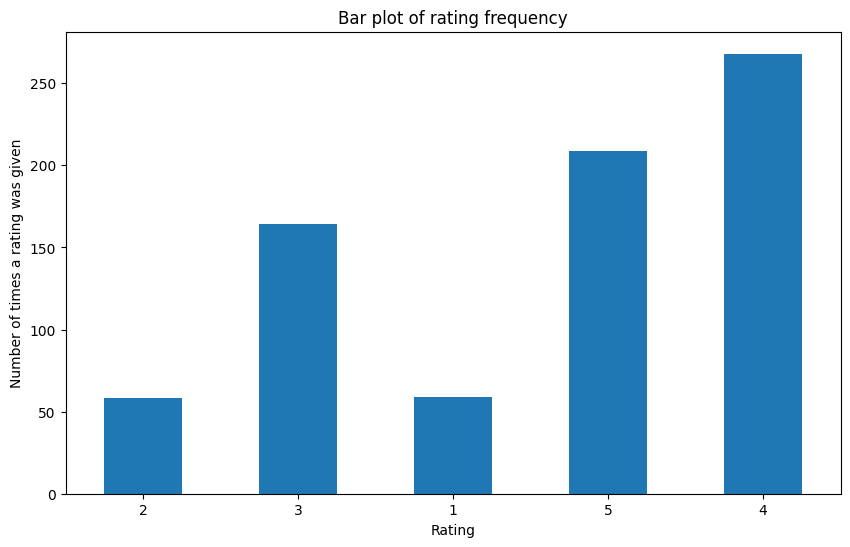

Total number of users watched this Genre:  758
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Documentary . Recommendations based on highest average ratings.
                                                      rating
movie title                                                 
Marlene Dietrich: Shadow and Light (1996)           5.000000
Great Day in Harlem, A (1994)                       5.000000
Everest (1998)                                      4.500000
Maya Lin: A Strong Clear Vision (1994)              4.500000
Hoop Dreams (1994)                                  4.094017
Paradise Lost: The Child Murders at Robin Hood ...  4.050000
When We Were Kings (1996)                           4.045455
Nico Icon (1995)                                    4.000000
Jupiter's Wife (1994)                               4.000000
Perfect Candidate, A (1996)                         4.000000
                 

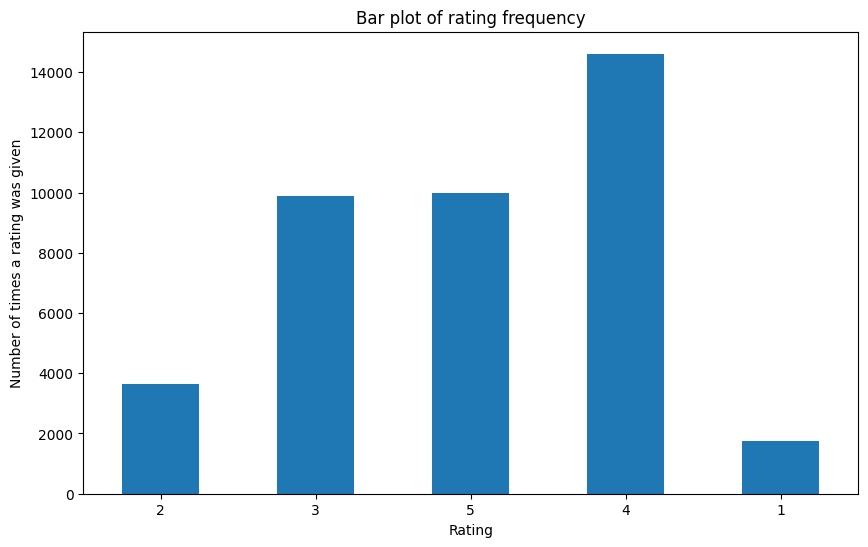

Total number of users watched this Genre:  39895
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Drama . Recommendations based on highest average ratings.
                                                     rating
movie title                                                
They Made Me a Criminal (1939)                     5.000000
Saint of Fort Washington, The (1993)               5.000000
Someone Else's America (1995)                      5.000000
Aiqing wansui (1994)                               5.000000
Prefontaine (1997)                                 5.000000
Entertaining Angels: The Dorothy Day Story (1996)  5.000000
Pather Panchali (1955)                             4.625000
Anna (1996)                                        4.500000
Some Mother's Son (1996)                           4.500000
Schindler's List (1993)                            4.466443
                             
   

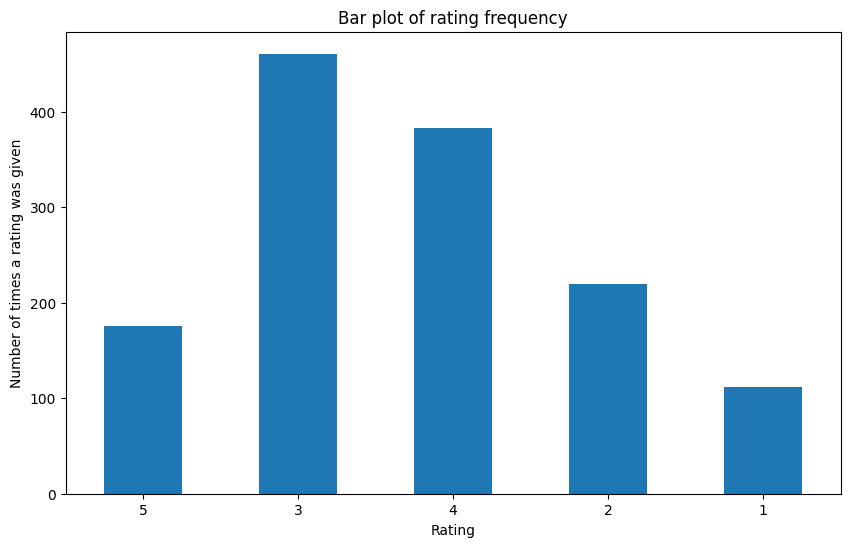

Total number of users watched this Genre:  1352
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Fantasy . Recommendations based on highest average ratings.
                                       rating
movie title                                  
Star Kid (1997)                      5.000000
E.T. the Extra-Terrestrial (1982)    3.833333
Heavenly Creatures (1994)            3.671429
20,000 Leagues Under the Sea (1954)  3.500000
Jumanji (1995)                       3.312500
Mask, The (1994)                     3.193798
Dragonheart (1996)                   3.082278
Warriors of Virtue (1997)            3.000000
FairyTale: A True Story (1997)       2.966667
Escape to Witch Mountain (1975)      2.966667
                             
                             
Most popular movies recommended to a new user for Fantasy genre. Recommendations based on Popularity
                           movie title 

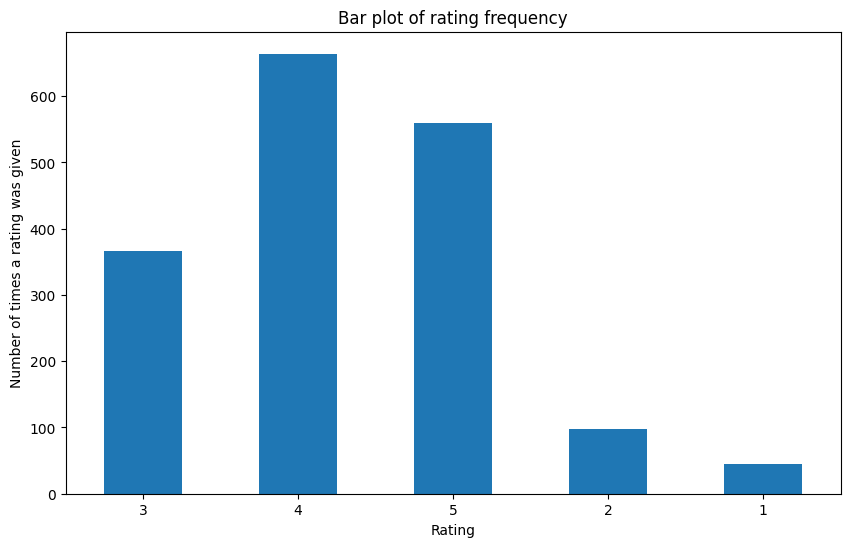

Total number of users watched this Genre:  1733
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Film-Noir . Recommendations based on highest average ratings.
                                    rating
movie title                               
Manchurian Candidate, The (1962)  4.259542
Crossfire (1947)                  4.250000
Maltese Falcon, The (1941)        4.210145
Sunset Blvd. (1950)               4.200000
L.A. Confidential (1997)          4.161616
Blade Runner (1982)               4.138182
Chinatown (1974)                  4.136054
Notorious (1946)                  4.115385
Laura (1944)                      4.100000
Big Sleep, The (1946)             4.027397
                             
                             
Most popular movies recommended to a new user for Film-Noir genre. Recommendations based on Popularity
                        movie title  Number of Users watched
0         

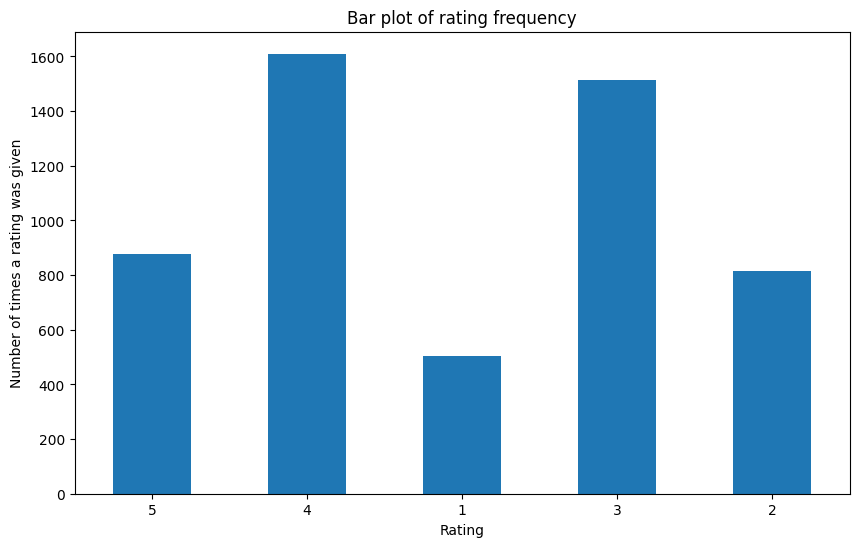

Total number of users watched this Genre:  5317
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Horror . Recommendations based on highest average ratings.
                                                      rating
movie title                                                 
Psycho (1960)                                       4.100418
Alien (1979)                                        4.034364
Young Frankenstein (1974)                           3.945000
Braindead (1992)                                    3.857143
Shining, The (1980)                                 3.825243
Birds, The (1963)                                   3.808642
Jaws (1975)                                         3.775000
Night Flier (1997)                                  3.714286
Bride of Frankenstein (1935)                        3.608696
Nosferatu (Nosferatu, eine Symphonie des Grauen...  3.555556
                     

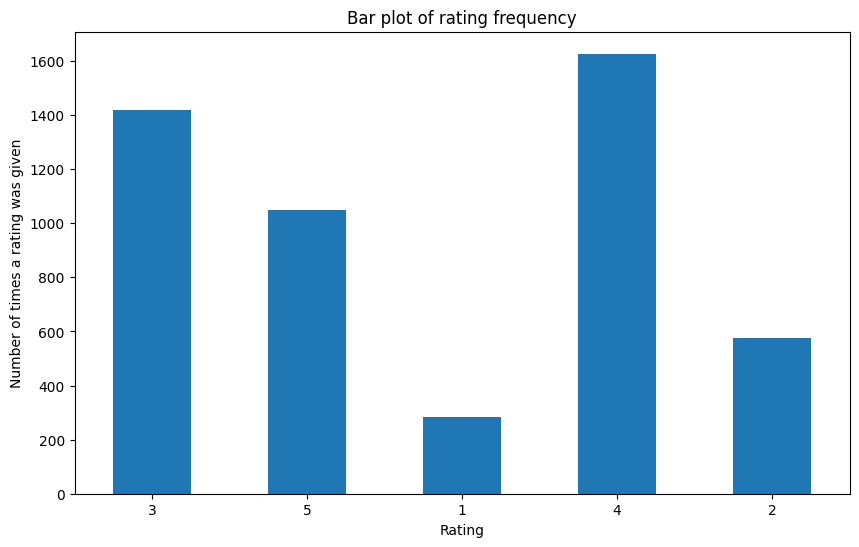

Total number of users watched this Genre:  4954
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Musical . Recommendations based on highest average ratings.
                                rating
movie title                           
Wizard of Oz, The (1939)      4.077236
Top Hat (1935)                4.047619
Damsel in Distress, A (1937)  4.000000
Singin' in the Rain (1952)    3.992701
This Is Spinal Tap (1984)     3.905759
Gay Divorcee, The (1934)      3.866667
Blues Brothers, The (1980)    3.836653
My Fair Lady (1964)           3.816000
Aladdin (1992)                3.812785
Beauty and the Beast (1991)   3.792079
                             
                             
Most popular movies recommended to a new user for Musical genre. Recommendations based on Popularity
                   movie title  Number of Users watched
0                 Evita (1996)                      259
1   Blues B

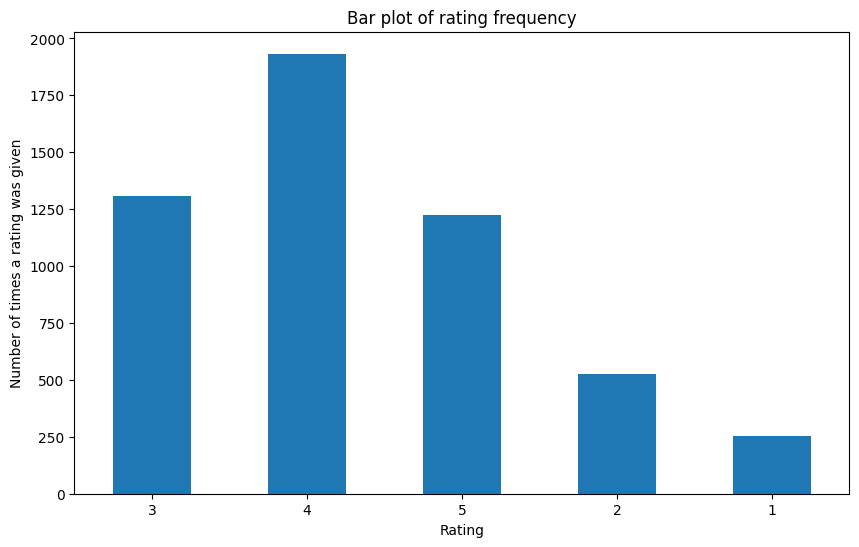

Total number of users watched this Genre:  5245
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Mystery . Recommendations based on highest average ratings.
                               rating
movie title                          
Rear Window (1954)           4.387560
Third Man, The (1949)        4.333333
Vertigo (1958)               4.251397
Maltese Falcon, The (1941)   4.210145
Amadeus (1984)               4.163043
L.A. Confidential (1997)     4.161616
Thin Man, The (1934)         4.150000
Chinatown (1974)             4.136054
Laura (1944)                 4.100000
Arsenic and Old Lace (1944)  4.078261
                             
                             
Most popular movies recommended to a new user for Mystery genre. Recommendations based on Popularity
                    movie title  Number of Users watched
0    Mission: Impossible (1996)                      344
1      L.A. Confident

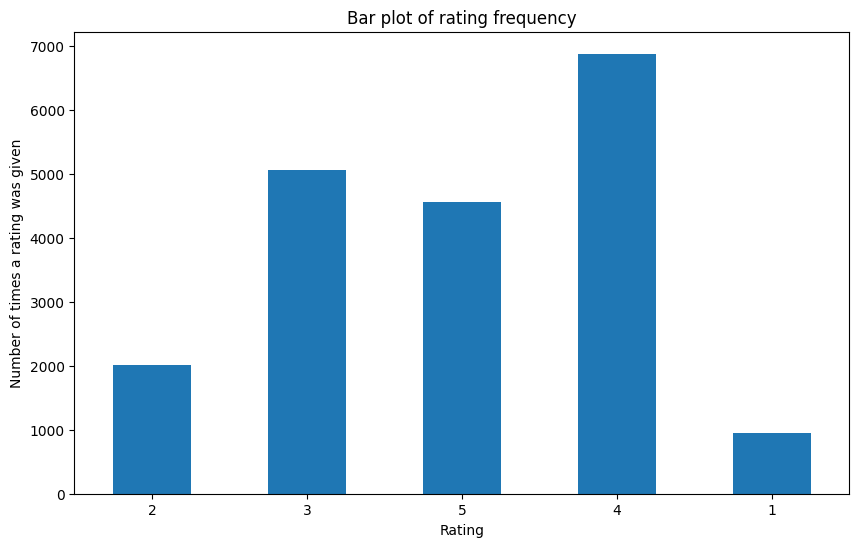

Total number of users watched this Genre:  19461
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Romance . Recommendations based on highest average ratings.
                                   rating
movie title                              
Casablanca (1942)                4.456790
Star Wars (1977)                 4.358491
Titanic (1997)                   4.245714
Empire Strikes Back, The (1980)  4.204360
Affair to Remember, An (1957)    4.192308
African Queen, The (1951)        4.184211
Cinema Paradiso (1988)           4.173554
Princess Bride, The (1987)       4.172840
Notorious (1946)                 4.115385
Philadelphia Story, The (1940)   4.115385
                             
                             
Most popular movies recommended to a new user for Romance genre. Recommendations based on Popularity
                       movie title  Number of Users watched
0                 Star War

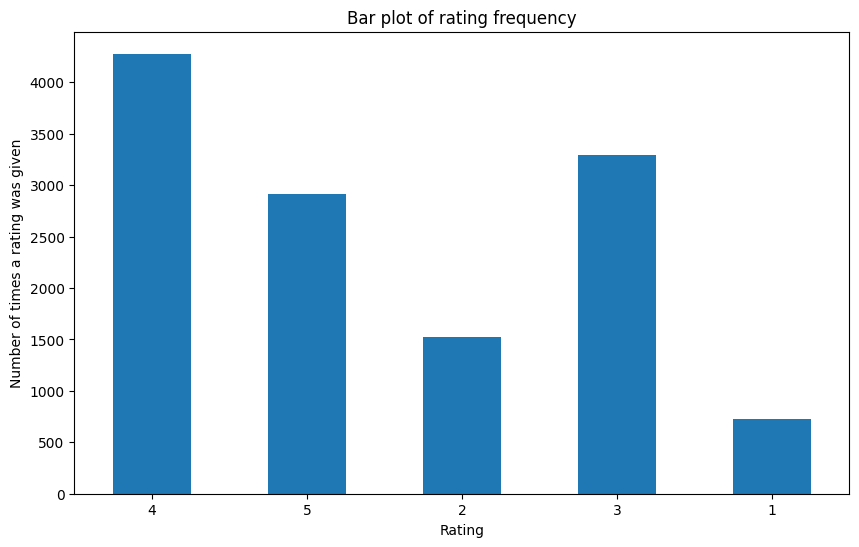

Total number of users watched this Genre:  12730
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Sci-Fi . Recommendations based on highest average ratings.
                                                      rating
movie title                                                 
Star Kid (1997)                                     5.000000
Star Wars (1977)                                    4.358491
Dr. Strangelove or: How I Learned to Stop Worry...  4.252577
Empire Strikes Back, The (1980)                     4.204360
Blade Runner (1982)                                 4.138182
Alien (1979)                                        4.034364
Return of the Jedi (1983)                           4.007890
Terminator 2: Judgment Day (1991)                   4.006780
2001: A Space Odyssey (1968)                        3.969112
Aliens (1986)                                       3.947183
                    

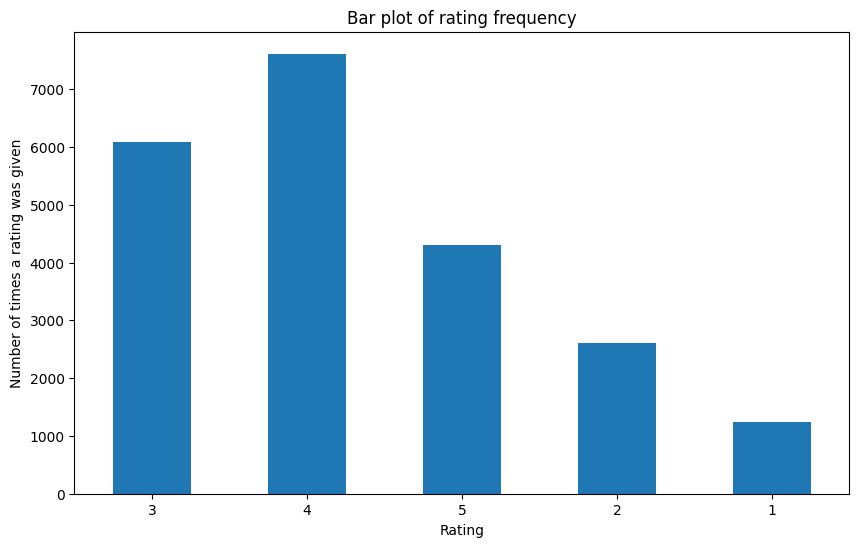

Total number of users watched this Genre:  21872
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Thriller . Recommendations based on highest average ratings.
                                           rating
movie title                                      
Close Shave, A (1995)                    4.491071
Rear Window (1954)                       4.387560
Usual Suspects, The (1995)               4.385768
Third Man, The (1949)                    4.333333
Some Folks Call It a Sling Blade (1993)  4.292683
Silence of the Lambs, The (1991)         4.289744
North by Northwest (1959)                4.284916
Manchurian Candidate, The (1962)         4.259542
Vertigo (1958)                           4.251397
Innocents, The (1961)                    4.250000
                             
                             
Most popular movies recommended to a new user for Thriller genre. Recommendations based on

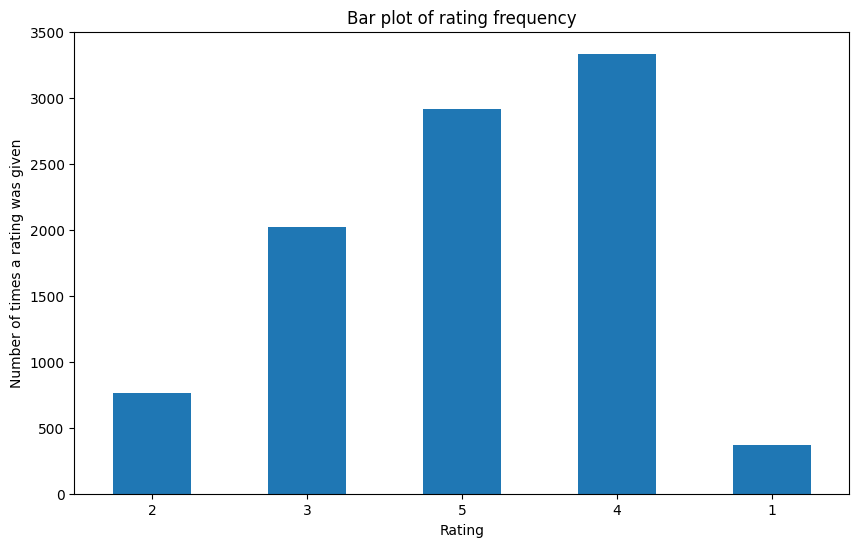

Total number of users watched this Genre:  9398
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: War . Recommendations based on highest average ratings.
                                                      rating
movie title                                                 
Schindler's List (1993)                             4.466443
Casablanca (1942)                                   4.456790
Star Wars (1977)                                    4.358491
Dr. Strangelove or: How I Learned to Stop Worry...  4.252577
Lawrence of Arabia (1962)                           4.231214
Paths of Glory (1957)                               4.212121
Empire Strikes Back, The (1980)                     4.204360
Boot, Das (1981)                                    4.203980
African Queen, The (1951)                           4.184211
Bridge on the River Kwai, The (1957)                4.175758
                        

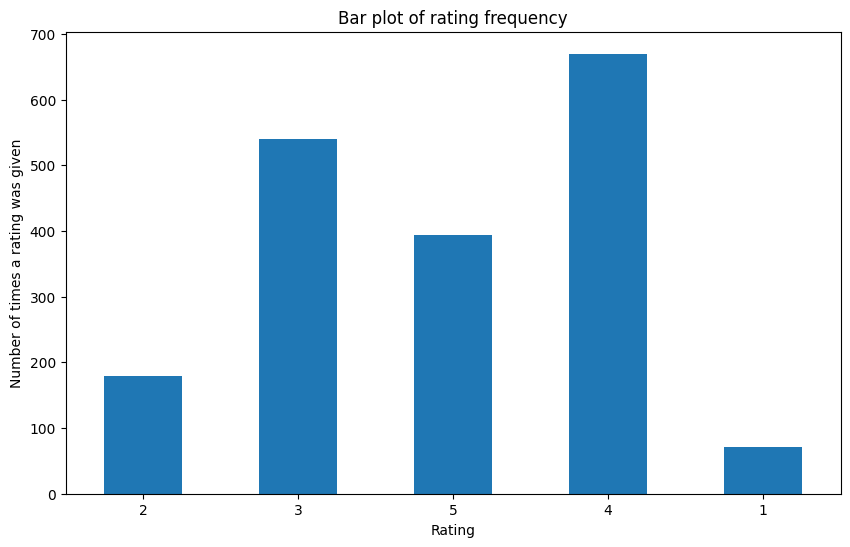

Total number of users watched this Genre:  1854
  
                             
                             
Top movies naviely suggested to the new users for the requested movie genre: Western . Recommendations based on highest average ratings.
                                             rating
movie title                                        
High Noon (1952)                           4.102273
Wild Bunch, The (1969)                     4.023256
Butch Cassidy and the Sundance Kid (1969)  3.949074
Magnificent Seven, The (1954)              3.942149
Once Upon a Time in the West (1969)        3.868421
Unforgiven (1992)                          3.868132
Good, The Bad and The Ugly, The (1966)     3.861314
Dead Man (1995)                            3.823529
Dances with Wolves (1990)                  3.792969
Tombstone (1993)                           3.666667
                             
                             
Most popular movies recommended to a new user for Western genre. Rec

In [42]:
for i in movie_genre_list[1:]:
  print(recommendations_genre(i))